In [1]:
import numpy as np 
import pandas as pd 

In [2]:
data = pd.read_csv("Data/advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


<AxesSubplot: >

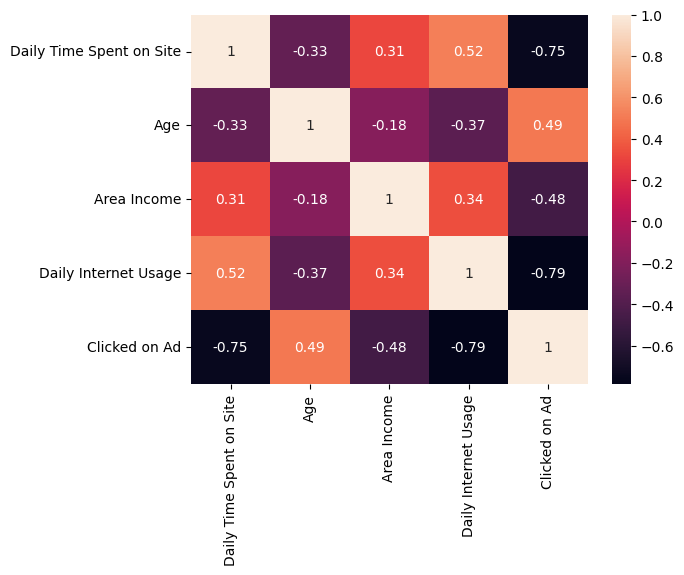

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt 
df = data.drop(['Ad Topic Line','Male','City','Timestamp','Country'],axis=1)
sns.heatmap(df.corr(),annot=True)

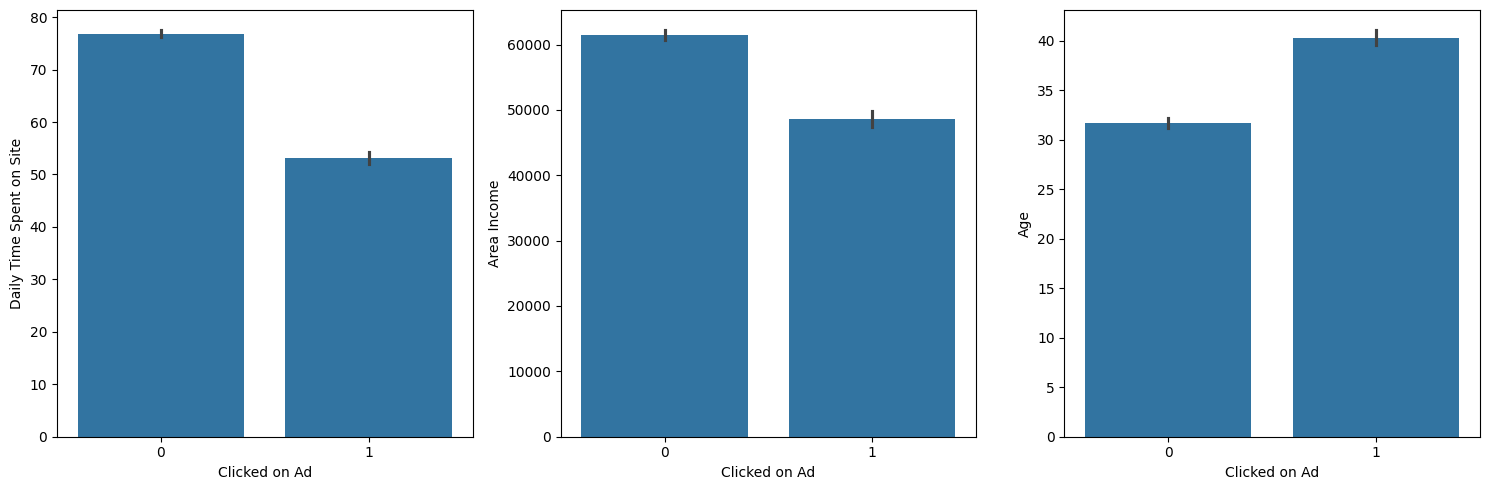

In [4]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x='Clicked on Ad',y='Daily Time Spent on Site',data=data,ax=ax[0])
sns.barplot(x='Clicked on Ad',y='Area Income',data=data,ax=ax[1])

sns.barplot(x='Clicked on Ad',y='Age',data=data,ax=ax[2])
plt.tight_layout()

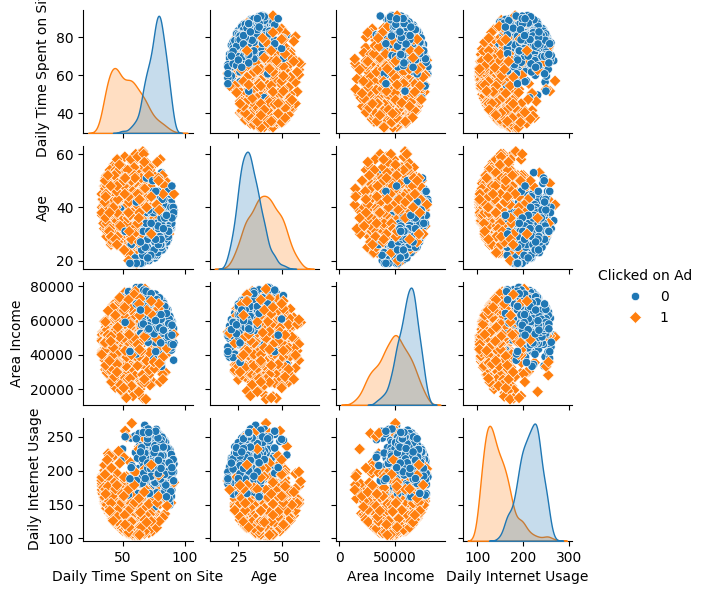

In [5]:
sns.pairplot(df,hue='Clicked on Ad',markers = ['o','D'],height = 1.5)

In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.00000


In [7]:
import networkx as nx

fitness = pd.read_csv("Data/Fitness_iter_1.csv")
G = nx.read_edgelist("Data/facebook_combined.txt",create_using = nx.DiGraph(),nodetype=int)

In [8]:
filtered_nodes = [node for node in G.nodes() if fitness.loc[fitness['node'] == int(node)]['fitness'].values > 0.2]
print(filtered_nodes)

C:\Users\anisr\AppData\Local\Temp\ipykernel_2364\2615110899.py:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  filtered_nodes = [node for node in G.nodes() if fitness.loc[fitness['node'] == int(node)]['fitness'].values > 0.2]


[62, 113, 172, 261, 1078, 391, 438, 513, 751, 764]


In [9]:
fit_ = []
for i in filtered_nodes:
    print(i,fitness.loc[fitness['node'] == i]['fitness'].values)
    fit_.append(fitness.loc[fitness['node'] == i]['fitness'].values)

62 [0.23380399]
113 [0.21022518]
172 [0.23961794]
261 [0.24501661]
1078 [0.24916944]
391 [0.24709302]
438 [0.24792359]
513 [0.22056109]
751 [0.24896179]
764 [0.24875415]


In [10]:
np.array(fit_).reshape(10)

array([0.23380399, 0.21022518, 0.23961794, 0.24501661, 0.24916944,
       0.24709302, 0.24792359, 0.22056109, 0.24896179, 0.24875415])

In [11]:
fitness = pd.DataFrame({'node':filtered_nodes,'fitness':np.array(fit_).reshape(10)})
fitness

,node,fitness
0,62,0.233804
1,113,0.210225
2,172,0.239618
3,261,0.245017
4,1078,0.249169
5,391,0.247093
6,438,0.247924
7,513,0.220561
8,751,0.248962
9,764,0.248754


In [12]:
df_ = df.sample(10).reset_index()
dfs = pd.concat([fitness,df_],axis=1)

In [13]:
dfs.drop(['index'],axis=1,inplace=True)
dfs 

,node,fitness,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,62,0.233804,63.88,38,19991.72,136.85,1
1,113,0.210225,79.89,30,50356.06,241.38,0
2,172,0.239618,78.01,26,62729.40,200.71,0
3,261,0.245017,49.78,46,71718.51,152.24,1
4,1078,0.249169,69.47,26,59785.94,236.50,0
5,391,0.247093,56.34,50,68713.70,139.02,1
6,438,0.247924,54.96,42,59419.78,113.75,1
7,513,0.220561,66.80,29,59683.16,248.51,1
8,751,0.248962,49.99,41,61068.26,121.07,1
9,764,0.248754,51.87,50,51869.87,119.65,1


In [57]:
import networkx as nx 
G = nx.read_edgelist("Data/facebook_combined.txt",create_using = nx.DiGraph(),nodetype=int)

In [58]:
for feature in dfs.columns[1:]:
    nx.set_node_attributes(G,dfs.set_index('node')[feature].to_dict(),feature)

In [59]:
node_attributes = dfs.set_index('node').to_dict('index')
nx.set_node_attributes(G, node_attributes)

In [60]:
from sources.Message_prop_model import message_prop_T

seed_nodes = filtered_nodes
activated_nodes = message_prop_T(G,seed_nodes,0.7)

In [61]:
len(activated_nodes)

3587

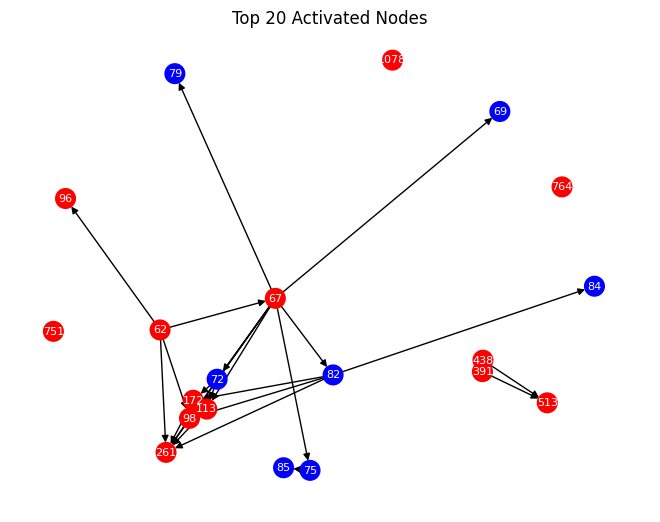

In [73]:
top_10_nodes = sorted(activated_nodes, key=lambda node: G.nodes[node].get('fitness', 0), reverse=True)[:20]
subgraph = G.subgraph(top_10_nodes)


seed_nodes = filtered_nodes  


node_colors = ['red' if node in seed_nodes else 'blue' for node in subgraph.nodes]


pos = nx.spring_layout(subgraph)  
nx.draw(subgraph, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8, font_color='white')
plt.title("Top 20 Activated Nodes")
plt.show()
